## Working with images in OpenCV

In openCV, you typically use the imshow() method along with the waitkey() and exitwindow() methods to display an image. Unfortunately, while this works in a python console like PyCharm, it crashes the Jupyter kernal. This is a common enough problem that there exists a workaround.

- [GitHub](https://github.com/ipython/ipython/issues/8770)
- [Stackoverflow thread](https://stackoverflow.com/questions/43943333/cv2-imshow-crashes-kernel)

The solution is to display images through pyplot, which also has an imshow method.


In [ ]:
#This simple example of thresholding an image crashes the kernal

import cv2

img = cv2.imread('violin.png') 
grey = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(grey, 0, 255, 
                            cv2.THRESH_BINARY_INV +
                            cv2.THRESH_OTSU) 
cv2.imshow('image', thresh)
cv2.waitKey(100)
cv2.destroyAllWindows()


If we work with pyplot (imported from matplotlib), we can display the image. Unfortunately, we encounter another problem:

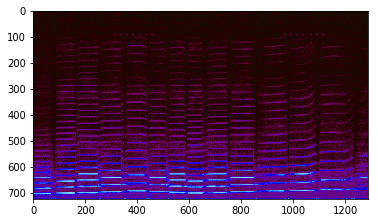

In [1]:
%matplotlib inline
from matplotlib import pyplot as plt
import cv2
image = cv2.imread('violin.png')
plt.imshow(image)
plt.show()

The image has a blue tint. It turns out that matplotlib reads the file in RGB, but openCV reads it as BGR. There are a couple of ways to fix this. Luckily, OpenCV has a color conversation function that's documented [here](https://docs.opencv.org/master/d8/d01/group__imgproc__color__conversions.html)

The correct code looks like this, and we can use this as the basis for future experiments.

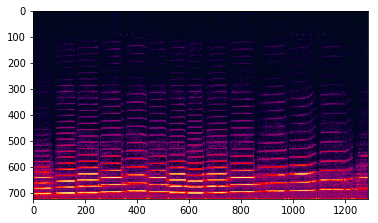

In [2]:
%matplotlib inline
from matplotlib import pyplot as plt
import cv2
image = cv2.imread('violin.png')
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
# plt.imshow(image[...,::-1]) also works, but it's more esoteric.
plt.show()
